# Step 3
## Reding the universe of street complaint data and ACS data for calculating index

In [96]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pylab as plt
import json
import os
s = json.load(open(os.getenv('PUI2015')+'/nk1877.json'));
plt.rcParams.update(s)
#import Psycopg
% pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
`%matplotlib` prevents importing * from pylab and numpy


In [67]:
loc=pd.read_csv('ulocations.csv')

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,16,19,24,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
## All data with no null lon lat values
twok5='https://data.cityofnewyork.us/resource/xk2u-49gx.json?$where=complaint_type=%27Street%20Condition%27%20and%20longitude%20is%20not%20null'
twok6='https://data.cityofnewyork.us/resource/txvy-sgqz.json?$where=complaint_type=%27Street%20Condition%27%20and%20longitude%20is%20not%20null'
twok7='https://data.cityofnewyork.us/resource/bjsb-smxa.json?$where=complaint_type=%27Street%20Condition%27%20and%20longitude%20is%20not%20null'
twok8='https://data.cityofnewyork.us/resource/ttef-akmb.json?$where=complaint_type=%27Street%20Condition%27%20and%20longitude%20is%20not%20null'
twok9='https://data.cityofnewyork.us/resource/76rq-desm.json?$where=complaint_type=%27Street%20Condition%27%20and%20longitude%20is%20not%20null'
y1016='https://data.cityofnewyork.us/resource/fhrw-4uyv.json?$where=complaint_type=%27Street%20Condition%27%20and%20longitude%20is%20not%20null'

In [38]:
streetdata = [twok5,twok6,twok7,twok8,twok9,y1016]

In [42]:
def scraper(readdata):
    year=5
    for i in readdata:
        data=pd.read_json(i)
        ar.append(data)
        data.to_csv('Raw/New/streetall'+str(year)+'.csv')
        year+=1
    

In [48]:
##Reading Data Set
d05=pd.read_csv("Raw/streetall5.csv")
d06=pd.read_csv("Raw/streetall6.csv")
d07=pd.read_csv("Raw/streetall7.csv")
d08=pd.read_csv("Raw/streetall8.csv")
d09=pd.read_csv("Raw/streetall9.csv")
d01016=pd.read_csv("Raw/New/streetall10.csv")

In [51]:
frames=[d05,d06,d07,d08,d09,d01016]

In [52]:
# Complate df of all the complaits of street condition for which data is available
df=pd.concat(frames)

In [82]:
# Dropping fields which are not needed
df=df.drop([u'x_coordinate_state_plane',
       u'x_coordinate_state_plane_', u'y_coordinate_state_plane',
       u'y_coordinate_state_plane_',u'location'],1)

In [85]:
## Shape of file for which we used google api to find location
loc.shape

(71663, 40)

In [84]:
## Shape of life for which we already haave location information
df.shape

(607875, 40)

In [86]:
dfstreet=pd.concat([df,loc])

In [138]:
import datetime
dfstreet['created_date']=pd.to_datetime(dfstreet['created_date'])

In [151]:
year=dfstreet['created_date'].apply(lambda x:x.year)

## Complete map of New York City Street Condition complaits from 2005 to 2016. There are lot of outliers in the map.

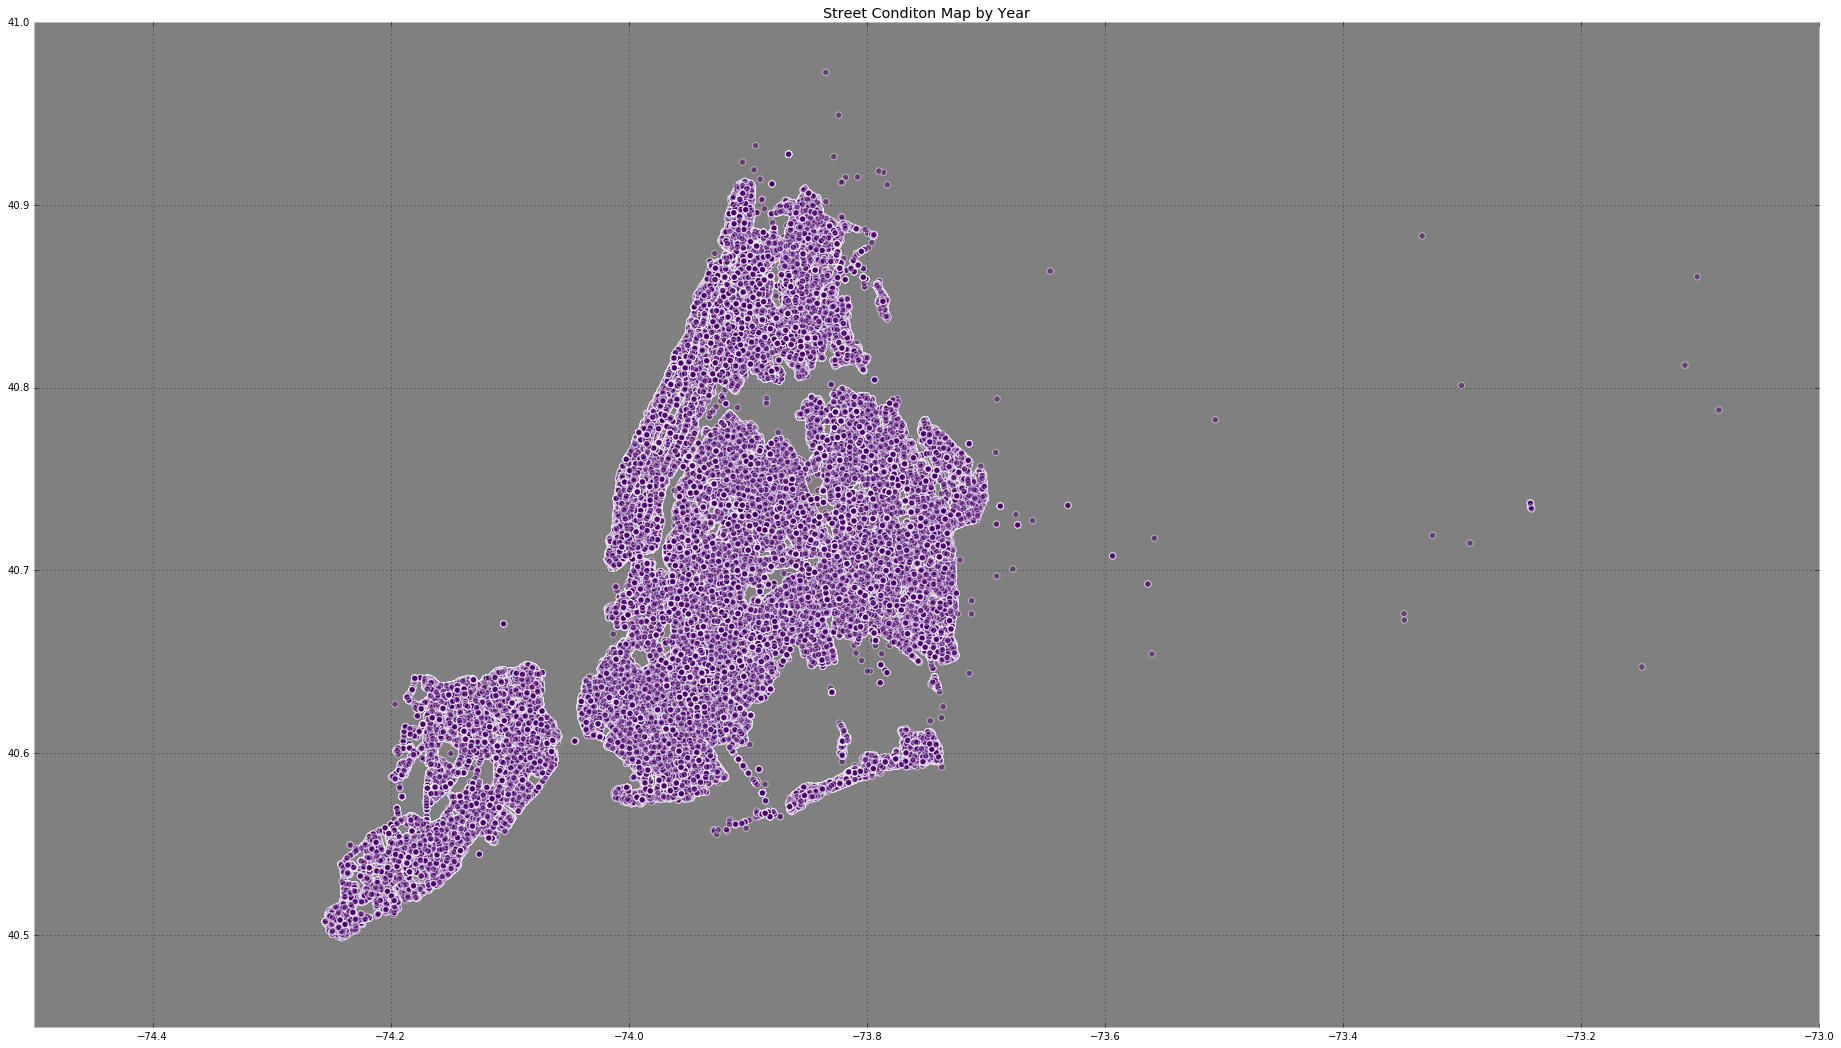

In [154]:
fig,ax = plt.subplots(figsize=(32,18))
ax.scatter(dfstreet['longitude'],dfstreet['latitude'],c=year,s=40, alpha=.5, cmap='RdPu', vmin=0, vmax=2)
plt.ylim(40.45,41)
plt.xlim(-74.5,-73)
plt.title("Street Conditon Map by Year")
ax.set_axis_bgcolor((0.5019607843137255, 0.5019607843137255, 0.5019607843137255))

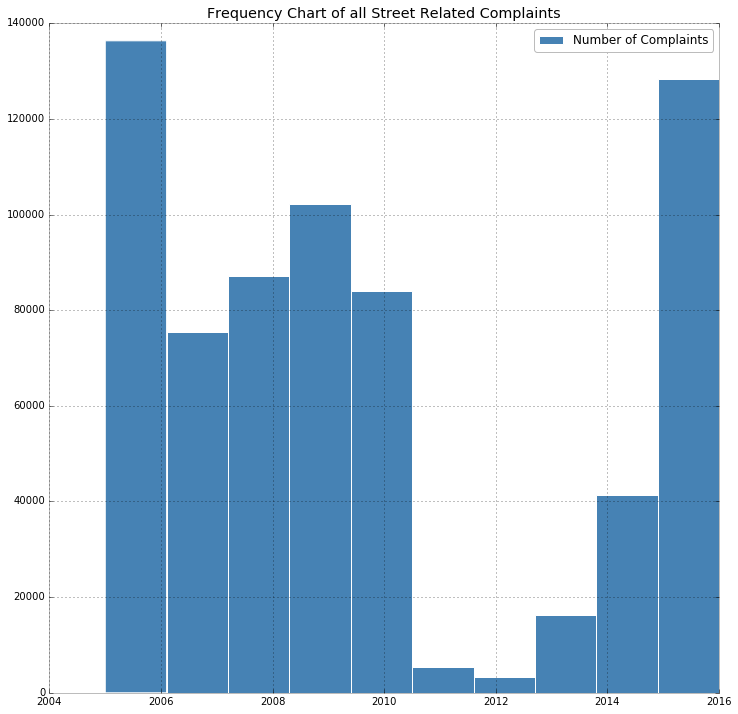

In [163]:
plt.figure(figsize=(12,12))
year.hist()
plt.legend(['Number of Complaints'])
plt.title('Frequency Chart of all Street Related Complaints')

In [164]:
## Creating a csv for final dataset
dfstreet.to_csv("Final/Final_Street.csv")